# Introduction to data analytics with pandas

In [1]:
import pandas as pd

## Key questions

1. Who are the main contributors to this dataset, and when are contributions generally made ?
2. What are the department's weekday coffee habits ?
3. How much coffee are people drinking ?

## Let's begin

In [2]:
import pandas as pd
%matplotlib inline

**Note :** The second line here tells `matplotlib` to plot directly under the cell where any plotting code is called. `pandas` uses `matplotlib` to generate graphs, and without this, the graphs would appear outside the Jupyter notebook when you called `plt.show()` - but we just want them to appear without having to do this.

http://ipython.readthedocs.io/en/stable/interactive/plotting.html#id1

## Importing the data

Let's import the coffee data from CSV.

In [3]:
%pwd

'C:\\Users\\lenovo\\Desktop\\files\\data science with python\\class-4 and 5'

In [4]:
# Read data from data/coffees.csv
data = pd.read_csv("coffees_bkp.csv")

**Note :** `pandas` can read from many data formats : CSV, JSON, Excel, HDF5, SQL, and more.

http://pandas.pydata.org/pandas-docs/version/0.20/io.html

#### What does this data look like ?

In [5]:
data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,testing,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


#### Let's just look at the first few rows.

In [6]:
# .head()
data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,testing,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


We have an index, and three columns : `timestamp`, `coffees`, and `contributor`.

Uh-oh. Why is there a string of text, `testing`, in our coffee numbers ? What's going on in the `coffees` column in the row after that ?

**Note :** `df.head(n=10)` would show the first ten rows. The default is `n=5`.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html

#### Let's look at that string in the third row.

In [7]:
# .loc or .iloc
data.loc[2]

timestamp      2011-10-05 07:02:00
coffees                    testing
contributor                Anthony
Name: 2, dtype: object

Definitely a string. We'll note this as something to fix after we finish looking around.

**Note :** `.loc` uses a label-based lookup, which means that the value you pass into the square brackets must be in the index. Another method, `.iloc`, is integer-location-based, so `.iloc[2]` would return the third row. In this case, they're the same, but had we changed our index, as we'll see later, things would work differently.

Indexing a dataframe with `[]` directly returns a `pd.Series` or `pd.DataFrame` by searching over *columns*, not rows. Indexing a `pd.Series` with `[]` is like indexing a dataframe with `.iloc`.

https://pandas.pydata.org/pandas-docs/stable/indexing.html

#### We should also take a look at that NaN. In fact, let's look at the first five values in `coffees`.

In [8]:
# [] indexing on a series
data.coffees.head(5)

0      397.0
1      410.0
2    testing
3        NaN
4      464.0
Name: coffees, dtype: object

**Note :** here, we're indexing a *series* ( a `pd.Series` object ). From a `pd.DataFrame` ( here, `data` ), when you access a single column ( `data.coffees` or `data["coffees"]` ), the object returned is a `pd.Series`. From that, indexing directly with `[]` works in an integer-location-based manner, and like with numpy arrays, you can take slices ( `[:5]` ).

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html

#### How long is the dataset ?

In [9]:
print("Dataset length :")

# len()
print(len(data))

Dataset length :
671


#### What else can we find out ?

In [10]:
# .describe()
data.describe()

,timestamp,coffees,contributor
count,671,658,671
unique,671,654,9
top,2012-12-18 11:04:00,9134.0,Quentin
freq,1,2,367


Looks like we also have some missing data - we have 671 rows, but the `coffees` column only has 658 entries.

**Note :** `.describe()` returns different things based on what's in the dataframe, as we'll see later. For numerical columns, it will return things like the mean, standard deviation, and percentiles. For object columns ( strings or datetimes ), it will return the most frequent entry and the first and last items. For all columns, `.describe()` will return the count of objects in that column ( not counting NaNs ) and the unique number of entries. You can determine what's returned using `.describe()`'s keyword arguments.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html

#### Let's look at the dataframe where `coffees` is null.

In [11]:
data[data.coffees.isnull()]

,timestamp,coffees,contributor
3,2011-10-05 08:25:00,NaN,Quentin
15,2011-10-07 14:10:00,NaN,Ben
72,2011-10-28 10:53:00,NaN,Mike M
95,2011-11-11 11:13:00,NaN,Quentin
323,2012-06-10 16:10:00,NaN,Sergio
370,2012-07-13 13:59:00,NaN,Mike
394,2012-08-03 14:35:00,NaN,Sergio
479,2012-09-21 10:15:00,NaN,Sergio
562,2012-11-01 09:45:00,NaN,Quentin
606,2012-11-30 13:11:00,NaN,Quentin


**Note :** `.isnull()` returns a boolean array ( an array of `True`s and `False`s ), that you can then use to index the dataframe directly. Here, our boolean array tells us which entries in the `coffees` column are null, and we use that to index against the full dataframe - so we get back every column in the dataframe, but only those rows where `coffees` is null.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html

#### What type of Python objects are the columns ?

In [12]:
# .dtypes
data.dtypes

timestamp      object
coffees        object
contributor    object
dtype: object

The `contributor` column makes sense as `object`, because we expect strings there; but surely the `timestamp` should be a timestamp-type, and `coffees` should be numerical ?

#### Let's inspect what's in the `timestamp` column.

In [13]:
# print the first element of the series with [] indexing
print()

# print its type()
data.timestamp[0]

'2011-10-03 08:22:00'

It looks like the `timestamp` field was read from CSV as a string. That makes sense - CSV files are very basic. We'll have `pandas` interpret these strings as datetimes for us automatically.

**Note :** here's an example of using direct `[]` indexing on a `pd.Series`. We're accessing the first entry, just to see what type of object we have there.

#### On our first pass, what problems did we find ?

- The `timestamp` column contains strings; these need to be datetimes
- The `coffees` column contains some null values and at least one string

## Cleaning the data

#### The `coffees` column should only contain numerical data.

 #### The `coffees` column contains NaNs.

In [14]:
print(data.shape[0])
#to check if any columns has na
data.isnull().any()
#coffees has null value

671


timestamp      False
coffees         True
contributor    False
dtype: bool

In [15]:
# Use .dropna() using a subset, and pass inplace


data.coffees.dropna(inplace=True)
data.isnull().any()

timestamp      False
coffees         True
contributor    False
dtype: bool

In [16]:
print(data.shape[0])
data.head(5)

671


,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,testing,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


In [17]:
#drop na means entire row of na is deleted

data.coffees.dropna(inplace=True)

data.head(5)

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,testing,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


#### The `coffees` column is of type `float`.

In [18]:
#changing testing to naan
import numpy as np

In [19]:
data.coffees[2]=np.NaN
data.coffees[2]

nan

In [20]:
#to count type of values in a data
data.coffees.value_counts()

12358.0    2
9134.0     2
7216.0     2
13523.0    2
10423.0    1
10242.0    1
14170.0    1
4687.0     1
2765.0     1
13127.0    1
13903.0    1
19698.0    1
16195.0    1
10609.0    1
1796.0     1
14222.0    1
464.0      1
8192.0     1
10094.0    1
4880.0     1
13993.0    1
7362.0     1
14944.0    1
7028.0     1
866.0      1
8078.0     1
15433.0    1
10135.0    1
1409.0     1
1070.0     1
          ..
11901.0    1
15614.0    1
8897.0     1
10856.0    1
13255.0    1
17789.0    1
2240.0     1
13559.0    1
6011.0     1
1985.0     1
11064.0    1
15144.0    1
10718.0    1
13432.0    1
10723.0    1
12203.0    1
3556.0     1
713.0      1
5333.0     1
6384.0     1
9049.0     1
14842.0    1
8776.0     1
7442.0     1
10922.0    1
581.0      1
3128.0     1
10983.0    1
6195.0     1
7862.0     1
Name: coffees, Length: 653, dtype: int64

In [21]:
data.coffees.head(5)

0    397.0
1    410.0
2      NaN
4    464.0
5    481.0
Name: coffees, dtype: object

In [22]:
data.head(5)

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,testing,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


In [23]:
# cast the coffees column using pd.to_numeric, and coerce errors
data.coffees = pd.to_numeric(data.coffees)

data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,NaN,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


In [24]:
# Cast to int using .astype()#both to numeric and as ttype has same function to numeric change only to numeric value whereas astype change which ever format we wat
data.coffees = data.coffees.astype('float')

data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,NaN,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


#### Let's have pandas parse the `timestamp` strings to datetime objects. 

In [25]:
# pd.to_datetime()
data.timestamp = pd.to_datetime(data.timestamp)


# Confirm dtypes
data.dtypes

timestamp      datetime64[ns]
coffees               float64
contributor            object
dtype: object

#### So where do we stand ?

In [26]:
# .describe(), passing the include kwarg to see all information
data.describe()

,coffees
count,657.000000
mean,8568.471842
std,4600.215049
min,397.000000
25%,4986.000000
50%,9172.000000
75%,11562.000000
max,24463.000000


In [27]:
data.describe(include='all')

,timestamp,coffees,contributor
count,671,657.000000,671
unique,671,NaN,9
top,2011-10-24 14:32:00,NaN,Quentin
freq,1,NaN,367
first,2011-10-03 08:22:00,NaN,NaN
last,2013-09-13 10:28:00,NaN,NaN
mean,NaN,8568.471842,NaN
std,NaN,4600.215049,NaN
min,NaN,397.000000,NaN
25%,NaN,4986.000000,NaN


In [28]:
# What do the first few rows look like ?
data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,NaN,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


**Note :** `.describe(include="all")` is describing all attributes of all columns, but some don't make sense based on the column's `dtype`. For example, the contributor column has no `first` and `last` attributes, because those describe the first and last entries in an ordered series. That makes sense for the timestamp - those have an intuitive definition of sorting - but not so much for strings ( alphabetical order doesn't really matter when they're arbitrary strings ). Similary, the timestamp column has no mean or other numerical traits. What does it mean to calculate the mean timestamp ?

## The time-series at a glance

#### Let's begin by visualising the coffee counts.

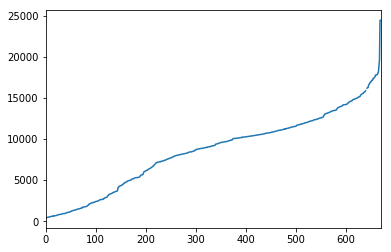

In [29]:
# .plot() on the coffees series
data.coffees.plot()

`pandas` is plotting the coffees against the index, which is just a series of integers.

**Note :** `.plot()` on a `pd.Series` will plot the data against the index. On a `pd.DataFrame`, the `.plot()` method allows plotting of one column against another.

By default, `.plot()` renders a line graph, but you can specify which type of plot you'd like - bar, line, histogram, area, scatter, etc..

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

#### Let's use the dataframe's `plot()` method rather than that of the series.

In [30]:
# .plot() on the dataframe, 
# pass x kwarg to plot against the timestamp
# use a dot-dash style


We have some very uneven spacing in places. We might start by cutting off the last few points of this time-series, which is missing a lot of data.

#### We'll inspect the last few points of this time-series.

In [31]:
# .tail() with ten rows
data.tail(10)

,timestamp,coffees,contributor
661,2013-03-04 11:12:00,17793.0,Quentin
662,2013-03-04 16:43:00,17824.0,Quentin
663,2013-03-05 10:42:00,17852.0,Quentin
664,2013-03-05 13:29:00,17868.0,Quentin
665,2013-03-08 10:28:00,18062.0,Quentin
666,2013-03-12 08:28:00,18235.0,Sergio
667,2013-04-05 11:20:00,18942.0,Sergio
668,2013-04-27 11:04:00,19698.0,Sergio
669,2013-09-12 15:38:00,24450.0,Quentin
670,2013-09-13 10:28:00,24463.0,Quentin


After mid-March, things start getting spaced rather erratically.

#### Let's cut off the tail of the time-series, anything after 2013-03-01.

In [32]:
# Use conditional indexing against the timestamp
data = data[data.timestamp < '2013-03-01']
data.tail()

,timestamp,coffees,contributor
655,2013-02-21 13:44:00,17345.0,Quentin
656,2013-02-21 15:02:00,17354.0,Quentin
657,2013-02-25 13:33:00,17468.0,Quentin
658,2013-02-25 17:25:00,17489.0,Quentin
659,2013-02-27 09:33:00,17564.0,Quentin


**Note :** this is another example of boolean indexing. `data.timestamp < "2013-03-01"` is a boolean array, and can be passed into the dataframe immediately in `[]`, much like with a `np.ndarray`.

#### One final look.

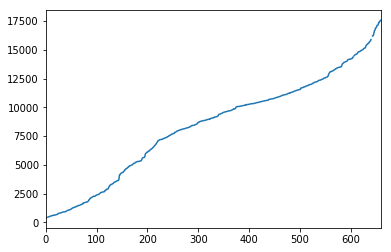

In [33]:
# Once again, plot the data against the timestamp
data.coffees.plot()

## 1. Contributions to the time-series

#### Who are our main contributors ?

In [34]:
# .value_counts()
data.contributor.value_counts()

Quentin    360
Mike       153
Sergio      93
Mike M      30
Colm        12
Anthony      5
Ben          4
Stefano      2
Arturo       1
Name: contributor, dtype: int64

**Note :** `.value_counts()` counts the unique values in a series. It's similar to doing a `.groupby()` followed by a `.count()`, as we'll see soon.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html

#### Let's plot this.

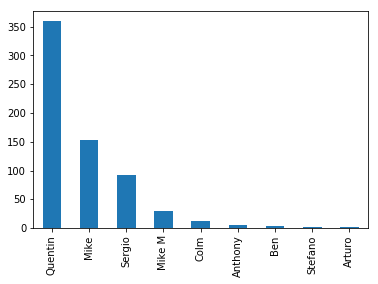

In [35]:
# .plot() a bar chart of the value counts
data.contributor.value_counts().plot(kind='bar')

#### On which weekdays were contributions made ?

In [36]:
# Create a series of the weekdays
# for each entry using .dt.weekday #
weekdays = data.timestamp.dt.weekday

# .assign() it to our dataframe
#data = 

data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,NaN,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


In [37]:
#now creating a new  column weekday
data=data.assign(week_day=data.timestamp.dt.weekday)
data.head()

,timestamp,coffees,contributor,week_day
0,2011-10-03 08:22:00,397.0,Quentin,0
1,2011-10-04 11:48:00,410.0,Quentin,1
2,2011-10-05 07:02:00,NaN,Anthony,2
3,2011-10-05 08:25:00,NaN,Quentin,2
4,2011-10-05 10:47:00,464.0,Quentin,2


#### Can we replace these integers with actual weekdays ?

In [38]:
weekday_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_dict = {key: weekday_names[key] for key in range(7)}

def day_of_week(idx):
    return weekday_dict[idx]
#above def funct. simply return the corresponding integer value for weekday
# Use .apply() to apply a custom function to the weekdays column
data.week_day = data.week_day.apply(day_of_week)

data.head() 

,timestamp,coffees,contributor,week_day
0,2011-10-03 08:22:00,397.0,Quentin,Monday
1,2011-10-04 11:48:00,410.0,Quentin,Tuesday
2,2011-10-05 07:02:00,NaN,Anthony,Wednesday
3,2011-10-05 08:25:00,NaN,Quentin,Wednesday
4,2011-10-05 10:47:00,464.0,Quentin,Wednesday


#### Let's group by these weekdays.

In [39]:
#weekday_counts =data.week_day.value_counts()  #another way of doing this is groupby
#weekday_counts

In [40]:
data.groupby('week_day').agg({'coffees':['sum','mean'],
                             'week_day':['count']})

coffees               week_day
                 sum          mean    count
week_day                                   
Friday      973016.0   8535.228070      121
Monday     1216643.0   8390.641379      148
Saturday    301002.0  10379.379310       29
Sunday       91013.0   7001.000000       14
Thursday    944727.0   8074.589744      118
Tuesday     814805.0   8400.051546       97
Wednesday  1075304.0   8208.427481      133

In [41]:
# .groupby() the weekdays and then .count() rows in each group
weekday_counts = data.groupby("week_day").count()

# We can reorder this dataframe by our weekday_names 
# list using .loc, indexing with the names
weekday_counts = weekday_counts.loc[weekday_names]

weekday_counts

,timestamp,coffees,contributor
week_day,,,
Monday,148,145,148
Tuesday,97,97,97
Wednesday,133,131,133
Thursday,118,117,118
Friday,121,114,121
Saturday,29,29,29
Sunday,14,13,14


**Note :** this first line could be replaced by `weekday_counts = data.weekdays.value_counts()`, with the only difference being that that would return a series to us, and here, we got back a dataframe.

#### We can now visualise these weekday counts.

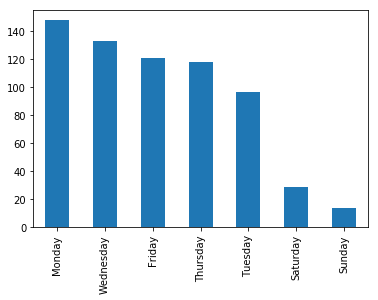

In [42]:
# Plot a bar chart of the coffees data in weekday_counts
# Title : "Datapoints added on each weekday"
data.week_day.value_counts().plot(kind='bar')

## 2. Weekday trends

#### First, we'll set our timestamps to the dataframe's index

In [43]:
# Set the dataframe's .index property
data.index = data.timestamp

# Let's drop the timestamp column, as we no longer need it

data.drop('timestamp',inplace=True,axis=1)
data.head()

,coffees,contributor,week_day
timestamp,,,
2011-10-03 08:22:00,397.0,Quentin,Monday
2011-10-04 11:48:00,410.0,Quentin,Tuesday
2011-10-05 07:02:00,NaN,Anthony,Wednesday
2011-10-05 08:25:00,NaN,Quentin,Wednesday
2011-10-05 10:47:00,464.0,Quentin,Wednesday


#### Let's add some rows at midnight on every day.

In [44]:
# pd.date_range, with daily frequency, and normalisation   #pd.date_range generate data at given frequency at daily level
midnights = pd.date_range(data.index[0],data.index[-1],freq='d',normalize=True)

midnights

DatetimeIndex(['2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-08', '2011-10-09', '2011-10-10',
               '2011-10-11', '2011-10-12',
               ...
               '2013-02-18', '2013-02-19', '2013-02-20', '2013-02-21',
               '2013-02-22', '2013-02-23', '2013-02-24', '2013-02-25',
               '2013-02-26', '2013-02-27'],
              dtype='datetime64[ns]', length=514, freq='D')

**Note :** `pd.date_range` creates a fixed-frequency DatetimeIndex. `normalize=True` ensures these datetimes are at midnight, and not at whatever time the starting point is.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html

#### Let's take the union of this index and our dataset's index.

In [45]:
# Take the union of the existing and new indices
new_index = midnights.union(data.index)

new_index

DatetimeIndex(['2011-10-03 00:00:00', '2011-10-03 08:22:00',
               '2011-10-04 00:00:00', '2011-10-04 11:48:00',
               '2011-10-05 00:00:00', '2011-10-05 07:02:00',
               '2011-10-05 08:25:00', '2011-10-05 10:47:00',
               '2011-10-05 13:15:00', '2011-10-06 00:00:00',
               ...
               '2013-02-21 15:02:00', '2013-02-22 00:00:00',
               '2013-02-23 00:00:00', '2013-02-24 00:00:00',
               '2013-02-25 00:00:00', '2013-02-25 13:33:00',
               '2013-02-25 17:25:00', '2013-02-26 00:00:00',
               '2013-02-27 00:00:00', '2013-02-27 09:33:00'],
              dtype='datetime64[ns]', length=1174, freq=None)

**Note :** the union of these indices is just a new index where entries from both indices are present. It's sorted by time.

#### Now we can reindex our dataframe with this new index.

In [46]:
# .reindex() the dataframe to get an upsampled dataframe
upsampled_data = data.reindex(new_index)

upsampled_data.head(10)

,coffees,contributor,week_day
2011-10-03 00:00:00,NaN,NaN,NaN
2011-10-03 08:22:00,397.0,Quentin,Monday
2011-10-04 00:00:00,NaN,NaN,NaN
2011-10-04 11:48:00,410.0,Quentin,Tuesday
2011-10-05 00:00:00,NaN,NaN,NaN
2011-10-05 07:02:00,NaN,Anthony,Wednesday
2011-10-05 08:25:00,NaN,Quentin,Wednesday
2011-10-05 10:47:00,464.0,Quentin,Wednesday
2011-10-05 13:15:00,481.0,Quentin,Wednesday
2011-10-06 00:00:00,NaN,NaN,NaN


**Note :** `.reindex()` keeps any values that conform to the new index, and inserts `NaN`s where we have no values.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html

#### We can fill in these `NaN`s using interpolation.

In [47]:
# .interpolate the upsampled_data using the time method
upsampled_data = upsampled_data.interpolate(method='time')

upsampled_data.head(10)

,coffees,contributor,week_day
2011-10-03 00:00:00,NaN,NaN,NaN
2011-10-03 08:22:00,397.000000,Quentin,Monday
2011-10-04 00:00:00,404.408262,NaN,NaN
2011-10-04 11:48:00,410.000000,Quentin,Tuesday
2011-10-05 00:00:00,438.664249,NaN,NaN
2011-10-05 07:02:00,455.189268,Anthony,Wednesday
2011-10-05 08:25:00,458.439449,Quentin,Wednesday
2011-10-05 10:47:00,464.000000,Quentin,Wednesday
2011-10-05 13:15:00,481.000000,Quentin,Wednesday
2011-10-06 00:00:00,494.066298,NaN,NaN


#### We're now ready to resample the time-series at a daily frequency.

In [48]:
# .resample() the upsampled dataframe,
# using .asfreq() to get only exactly daily values
daily_data = upsampled_data.resample("D").asfreq()

# Drop the contributor column, we no longer need it
daily_data = daily_data.drop(["contributor"], axis=1) 

# Generate a column of weekday_names
daily_data["weekdays"] = daily_data.index.weekday_name

daily_data.head()

,coffees,week_day,weekdays
2011-10-03,NaN,NaN,Monday
2011-10-04,404.408262,NaN,Tuesday
2011-10-05,438.664249,NaN,Wednesday
2011-10-06,494.066298,NaN,Thursday
2011-10-07,572.844311,NaN,Friday


In [49]:
#the data below does not givehow many coffewere brewed on a particular day rather it gives consecutive sum from day 1 (so now we have to find how many coffee werebrewed on a single day)
daily_data.drop(['week_day'],axis=1,inplace=True)

daily_data.head()

,coffees,weekdays
2011-10-03,NaN,Monday
2011-10-04,404.408262,Tuesday
2011-10-05,438.664249,Wednesday
2011-10-06,494.066298,Thursday
2011-10-07,572.844311,Friday


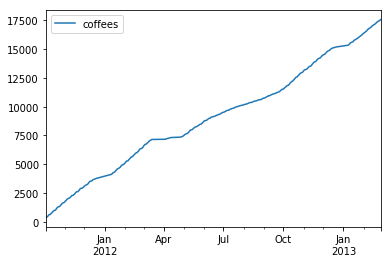

In [50]:
# Let's plot the data once more, to see how we're doing
daily_data.plot()

#### Let's begin by figuring out how many coffees are made on any given day.

In [51]:
# Use .diff() on the coffees column; follow up with .shift()  the shift(-1) make the data 1 step upward and by default thediff(-)- is 1 it can be changed to 2 so it skips 1 value
coffees_made = daily_data.coffees.diff().shift(-1)

# Add this as a column to the dataframe   alternate method for creating column in sollutions
daily_data = daily_data.assign(coffees_made_today=daily_data.coffees.diff().shift(-1))
daily_data.head(10)


,coffees,weekdays,coffees_made_today
2011-10-03,NaN,Monday,NaN
2011-10-04,404.408262,Tuesday,34.255987
2011-10-05,438.664249,Wednesday,55.402049
2011-10-06,494.066298,Thursday,78.778013
2011-10-07,572.844311,Friday,64.392941
2011-10-08,637.237253,Saturday,7.492196
2011-10-09,644.729448,Sunday,8.195209
2011-10-10,652.924658,Monday,81.648549
2011-10-11,734.573206,Tuesday,46.351008
2011-10-12,780.924214,Wednesday,71.254295


**Note :** we use `.shift()` here because if we look at the `.diff()` between a Monday and a Tuesday, those coffees are attributed to the Tuesday. However, what we want to say is "this many coffees were made at some point on the Monday", so we shift the entire series up one.

#### Now we can group this by weekday.

In [52]:
# .groupby weekdays, take the mean, and
# grab the coffees_made_today column (through groupby we perform a action on the colomns we want to) alternate method on sollution
coffees_by_day = daily_data.groupby("weekdays").agg({'coffees_made_today':['sum','mean']})


coffees_by_day

coffees_made_today           
                         sum       mean
weekdays                               
Friday           2492.076478  34.138034
Monday           2759.575493  37.802404
Saturday         1189.889616  16.299858
Sunday           1151.079670  15.768215
Thursday         3175.560185  43.500824
Tuesday          2895.839365  39.132964
Wednesday        3477.724170  47.640057

In [53]:
type(coffees_by_day)

pandas.core.frame.DataFrame

#### Let's order this series and then plot it.

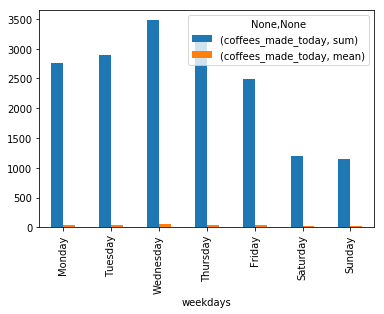

In [54]:
# Sort coffees_by_day by our list of weekend names
coffees_by_day = coffees_by_day.loc[weekday_names]

# Plot a bar chart lendends can be removed by passing legend=falese
coffees_by_day.plot(kind='bar')

Wednesdays was seminar day...

## 3. Coffee per person

#### We can now pull in data on how many people were in the department.

In [55]:
# Bring in data/department_members.csv;
# have the first column be the index, and parse the dates
people = pd.read_csv("department_members.csv")

people.head()

,date,members
0,2011-08-31,12
1,2011-09-30,14
2,2011-10-31,14
3,2011-11-30,14
4,2011-12-31,15


In [56]:
#here the new methods or funtions remove the index columns and assign it as dates)
people=pd.read_csv("department_members.csv",index_col='date',parse_dates=True)

people.head()

,members
date,
2011-08-31,12
2011-09-30,14
2011-10-31,14
2011-11-30,14
2011-12-31,15


#### Let's join the datasets.

In [57]:
people.columns

Index(['members'], dtype='object')

In [58]:
daily_data.columns

Index(['coffees', 'weekdays', 'coffees_made_today'], dtype='object')

In [59]:
# Use an outer join, then interpolate over 
# missing values using nearest values
daily_data = daily_data.join(people, how="outer").interpolate(method="nearest")

daily_data.head()

,coffees,weekdays,coffees_made_today,members
2011-08-31,NaN,NaN,NaN,12.0
2011-09-30,NaN,NaN,NaN,14.0
2011-10-03,NaN,Monday,NaN,14.0
2011-10-04,404.408262,Tuesday,34.255987,14.0
2011-10-05,438.664249,Wednesday,55.402049,14.0


**Note :** by default, inner joins are performed. That is, if a row from one of the datasets has an index that isn't in the other dataset, that row is dropped. You can specify whether you want outer, left, or right joins, as well plenty of other useful options. The `pandas` API for joining or merging datasets is very developed.

https://pandas.pydata.org/pandas-docs/stable/merging.html

#### Let's create a column for the number of coffees consumed per person.

In [60]:
# New column is the ratio of coffees made on a
# given day to number of members in the department (daily_data["coffees_per_person"] = ) through this we creat a new table and assign a function to it as below division
daily_data["coffees_per_person"] = daily_data.coffees_made_today / daily_data.members

# Let's drop those remaining NaNs while we're at it


daily_data.head(n=10)

,coffees,weekdays,coffees_made_today,members,coffees_per_person
2011-08-31,NaN,NaN,NaN,12.0,NaN
2011-09-30,NaN,NaN,NaN,14.0,NaN
2011-10-03,NaN,Monday,NaN,14.0,NaN
2011-10-04,404.408262,Tuesday,34.255987,14.0,2.446856
2011-10-05,438.664249,Wednesday,55.402049,14.0,3.957289
2011-10-06,494.066298,Thursday,78.778013,14.0,5.627001
2011-10-07,572.844311,Friday,64.392941,14.0,4.599496
2011-10-08,637.237253,Saturday,7.492196,14.0,0.535157
2011-10-09,644.729448,Sunday,8.195209,14.0,0.585372
2011-10-10,652.924658,Monday,81.648549,14.0,5.832039


#### We can now plot this column.

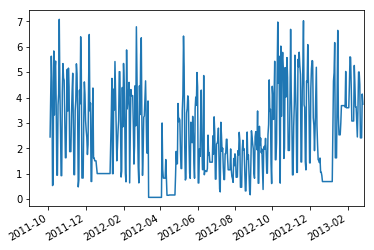

In [61]:
# Plot the coffees_per_person column
daily_data.coffees_per_person.plot()

#### Those are strange plateaus. We'll pull in another dataset, telling us when the machine was broken.

In [62]:
# read data/coffee_status.csv
# parse_dates as kwarg; also pass index_col
machine_status = pd.read_csv('coffee_status.csv', parse_dates=["date"], index_col="date")
machine_status.head()

,status
date,
2011-09-16,OK
2011-09-17,OK
2011-09-18,OK
2011-09-19,OK
2011-09-20,OK


**Note :** the `parse_dates` keyword argument takes several values. By passing in a list of strings, we're telling `pandas` to attempt to parse the dates in columns with those names.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

#### What values are in the `status` column ?

In [63]:
# .value_counts()
machine_status.status.value_counts()

OK        514
BROKEN     88
Name: status, dtype: int64

In [64]:
machine_status.status.nunique()

2

In [65]:
machine_status.head()

,status
date,
2011-09-16,OK
2011-09-17,OK
2011-09-18,OK
2011-09-19,OK
2011-09-20,OK


#### A quick trick to plot this as a time-series... # here we have a string type data or object in machine status as ok or broken so first 
# here we are converting it to boolean value aand then to int  as 1 for ok n 0 for broken beacuse an object type data cannot be plotted

In [66]:
status=(machine_status.status=='OK').astype(int)
machine_status['status']=status

In [67]:
machine_status.head()

,status
date,
2011-09-16,1
2011-09-17,1
2011-09-18,1
2011-09-19,1
2011-09-20,1


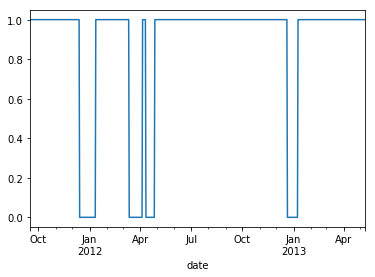

In [68]:
# Make a pd.Series from the status series where things are OK
numerical_status=machine_status.status
numerical_status.plot()

**Note :** the first line here creates a boolean `pd.Series`, holding the value `True` when `machine_status.status` is `"OK"`, and `False` otherwise. Because it's a `pd.Series`, its index stays the same as that of `machine_status`, which was a `DatetimeIndex`. Then, we can plot the boolean series ( `True` appearing as `1`, and `False` appearing as `0` ), and just quickly scan to see that there are long areas where the coffee machine was operations, with short bouts ( thankfully ! ) of the machine being broken.

#### Let's join the datasets on the date field !

In [69]:
# .join() daily_data with machine_status
daily_data = daily_data.assign(status=machine_status.status)

daily_data.head()

,coffees,weekdays,coffees_made_today,members,coffees_per_person,status
2011-08-31,NaN,NaN,NaN,12.0,NaN,NaN
2011-09-30,NaN,NaN,NaN,14.0,NaN,1.0
2011-10-03,NaN,Monday,NaN,14.0,NaN,1.0
2011-10-04,404.408262,Tuesday,34.255987,14.0,2.446856,1.0
2011-10-05,438.664249,Wednesday,55.402049,14.0,3.957289,1.0


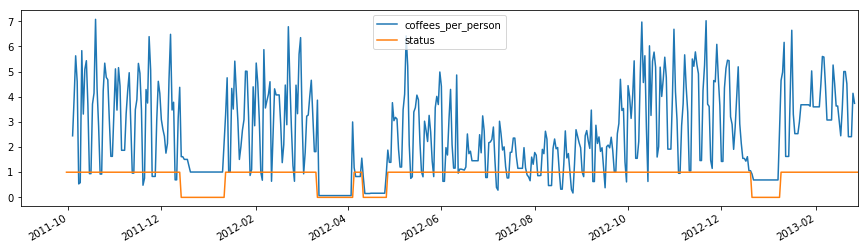

In [70]:
# now 2 columns are plotted below  figsize increases size
daily_data[['coffees_per_person','status']].plot(figsize =(15,4))

#### We'll bring in this numerical representation of status column into our dataframe too.

In [71]:
# Column depicting when the status was "OK"
# Cast the series to ints before as you create a new column in the dataframe
daily_data["numerical_status"] = (daily_data.status == "OK").astype(int)

daily_data.head()

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\ops.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

#### Let's plot both the coffees per person and the numerical status.

In [ ]:
# Plot both columns on the same graph, using default args


#### We see a strong weekday-weekend effect. Resampling weekly will fix that.

In [ ]:
# Resample weekly, taking the mean
# of each week to get a weekly value
weekly_data = 

# Plot the coffees per person and the machine's status


## What have we achieved ?

#### Cleaning

- Cast columns to the correct dtypes
- Dropped rows with no data
- Truncated the time-series when things got sparse

#### Exploring the contributions

- Discovered who contributed to the dataset and how much
- Established how contributions varied by day of the week

#### Exploring the time-series

- Resampled the uneven time-series to regular daily intervals
- Interpolated over missing data using our time index
- Discovered on what days of the week coffee was especially popular
- Joined the dataset with others to enrich the information available
- Derived new columns from existing ones
- Smoothed the time-series by weekly downsampling

#### Insights

- A small number of people contributed most of the data
- Contributions were lacking at the weekends, and Mondays had the most contributions
- Seminar Wednesdays is a strong driver of coffee consumption
- Periods of low coffee drinking correlated strongly with periods where the machine was broken
- A significant dip in consumption occurred in the summer months